# W207 Final Project: Forest Cover Prediction 

### Team: Adara Liao, Apik Zorian, Chandra Shekar Bikkanur, Tejenderpal Singh

# Table of contents

**[Introduction](#introduction)**


**[Exploratory Data Analysis](#eda)**

1. [Data Structure](#structure)
2. [Univariate Data Analysis](#univariate)
3. [Binary Feature](#binary)
4. [Correlation Matrix](#correlation)

**[Data Cleaning](#cleaning)**

**[Feature Engineering](#engineering)**


**[Model Selection](#model)**

1. [Support Vector Machine](#svm)
2. [Random Forest](#rf)
3. [Extra Trees](#extra)
4. [XGBoost](#xg)
5. [Ensemble](#ensemble)
6. [Results](#results)


**[Error Analysis](#error)**


**[Conclusion](#conclusion)**


## <h2 align="center"> Introduction <a name="introduction"></a> </h2>

In this project, we will use data from Kaggle's Forest Cover Type competition to predict a type of forest cover using cartographic variables. The training set comes from the tree types found in the Roosevelt National Forest of Colorado.
Kaggle link is at https://www.kaggle.com/c/forest-cover-type-prediction.

Our goal is for our model to make accurate prediction on the cover type given a new data point.

#### Approach

We will begin by analizing the data given to us. We will utilize exploratory data analysis to investigate nuances in our training features and make observations on different trends we see. We will then outline a series of data cleaning and feature selection steps, as well as engineer a few features by combining/transforming features we are given. We will run our training and testing data through a single preprocessing pipeline to assure the two are in sync.

We will experiment with different ML models, and choose a few we find have the best accuracy. We will do this by checking their F1 scores and testing our results against our dev data. We will also use GridSearch to optimize the best parameters for each of them. Once we have chosen our models, we will combine them into an ensemble learner, which will be our final combined model. With this model, we will make a prediction on our testing data, output the predicted labels, and submit our results to Kaggle to check our models' accuracy.


*Illustration of cover types*

![](https://i.ibb.co/JBhQHST/all-trees.png)

[](https://i.ibb.co/JBhQHST/all-trees.png)

![](http://)

## <h2 align="center"> Exploratory Data Analysis <a name="eda"></a> </h2>

### Data Structure  <a name="structure"></a>

Load Python libraries below to enable coding and output a file to verify predictons in Kaggle.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting
import seaborn as sns; sns.set() # for plotting 
from IPython.display import display
import warnings
warnings.filterwarnings("ignore") # To ignore warning messages while executing the code.

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# SK-learn libraries for learning.
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

# SK-learn libraries for evaluation.
from sklearn import metrics 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



We load in data and get a first look at number of observations and structure of data set.

* There are 15,120 observations, with 12 features. 
* The feature Soil Type has 40 different values, each represented by a column in data set.
* There is roughly equal occurences of each type of tree cover

In [2]:
data = pd.read_csv("../input/train.csv")
test_data = pd.read_csv("../input/test.csv")
print("Size of Training Data = " + str(data.shape[0]))
print("Size of Testing Data = " + str(test_data.shape[0]))
print("Number of Features = " + str(data.shape[1]))

Size of Training Data = 15120
Size of Testing Data = 565892
Number of Features = 56


Below are the 12 different features we are given, and a short description about each one

1. **Elevation** - Elevation in meters 
2. **Aspect** - Aspect in degrees azimuth 
3. **Slope** - Slope in degrees 
4. **Horizontal_Distance_To_Hydrology** - Horzontal Dist to nearest surface water features 
5. **Vertical_Distance_To_Hydrology** - Vertical Dist to nearest surface water features 
6. **Horizontal_Distance_To_Roadways** - Horzontal Dist to nearest roadway 
7. **Hillshade_9am (0 to 255 index)** - Hillshade index at 9am, summer solstice 
8. **Hillshade_Noon (0 to 255 index)** - Hillshade index at noon, summer solstice 
9. **Hillshade_3pm (0 to 255 index)** - Hillshade index at 3pm, summer solstice 
10. **Horizontal_Distance_To_Fire_Points** - Horzontal Dist to nearest wildfire ignition points 
11. **Wilderness_Area** (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation 
12. **Soil_Type** (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation 

Target: **Cover_Type** - (7 types, integers 1 to 7)- Forest Cover Type designation. Below are the 7 cover types

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

## Data Exploration

In [3]:
data.describe().T # To know the descriptive statistical info of the features

,count,mean,std,min,25%,50%,75%,max
Id,15120.0,7560.500000,4364.912370,1.0,3780.75,7560.5,11340.25,15120.0
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.00,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.00,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.00,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.00,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.00,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.00,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.00,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.00,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.00,138.0,167.00,248.0


### Cover Types

The distribution of cover types is uniform, with almost equal split of tree type in data set.

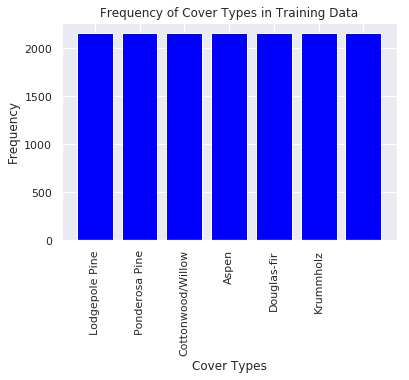

In [4]:
Labels = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
fig, ax = plt.subplots()
coversType = data['Cover_Type']
bar_x = np.arange(1,8,1)
ax.bar(bar_x, np.asarray(coversType.value_counts()), color='blue')
ax.set_xticklabels(Labels, rotation=90) #set the labels and rotate them 90 deg.
ax.set_xlabel('Cover Types')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Cover Types in Training Data')
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
plt.show()


### Univariate Data Analysis  <a name="univariate"></a>

By analyzing individual features, we can get initial clues on which features have strong influence on prediction and constraints on model selection.

#### Distribution of feature values

Looking at histogram of all features, we see clear patterns among observations.

* Not normally distributed: Aspect and Elevation. Further inspection shows that elevation varies clearly across cover type.
* Normally distributed: Hillshade_3pm, Slope
* Right skewed: hillshade_9am, hillshade_Noon
* Left skewed: Horizontal_Distance_To_hydrology, Horizontal_Distance_To_Roadways, vertical_Distance_To_hydrology

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f570924fcc0>,
      dtype=object)

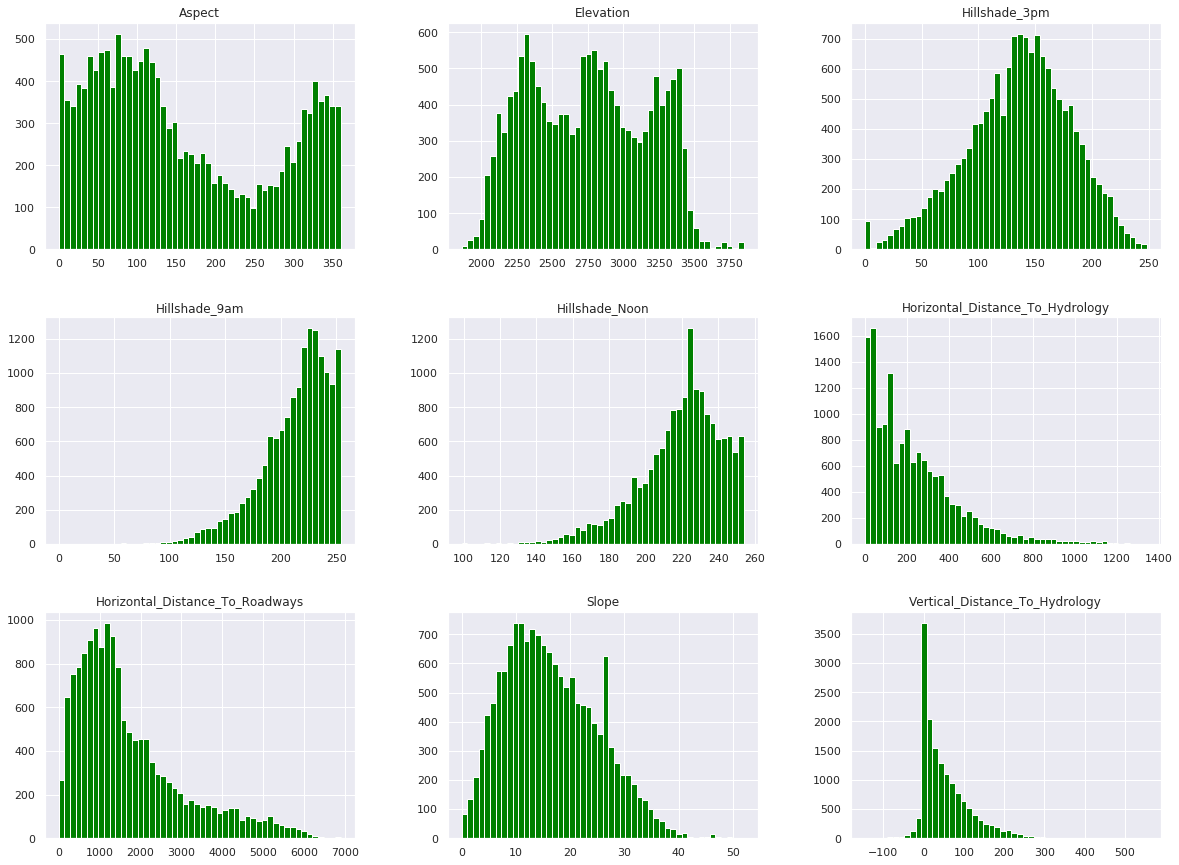

In [5]:
data.loc[:, 'Elevation': 'Hillshade_3pm'].hist(bins=50, figsize=(20,15), color = 'green') # Histograms to see the distribution of different features in the given data

#### Distribution across cover types for each feature
For each feature, we view distribution of observations among cover types.

In [6]:
# Function to plot Histogram of a 'feature' in the entire data ('df') including 'label' specific histogram
def plotFeatureHistogram(df, feature, labels,take_log):    
    fig = plt.figure(figsize=(20,10))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for i in range(1,9):        
        ax = fig.add_subplot(2, 4, i)
        if take_log==True:
            feature_data = np.log(df[feature])
        else:
            feature_data = df[feature]
        if i == 1:
           ax.hist(feature_data, color='green', bins = 'fd', range=[feature_data.min(), feature_data.max()]) 
           ax.set_title(feature + ': Total ') 
        else:    
            ax.hist(feature_data[df['Cover_Type'] == i-1], bins = 'fd', range=[feature_data.min(), feature_data.max()])        
            ax.set_title(feature + ': ' + labels[i-2])
    return None  

##### Elevation
From boxplot below, elevation is highly correlated with cover type. Ponderosa pine, Aspen, Douglas-fir trees (cover type 3,5,6) seem to thrive predominantly at lower elevations (below 2500 meters).

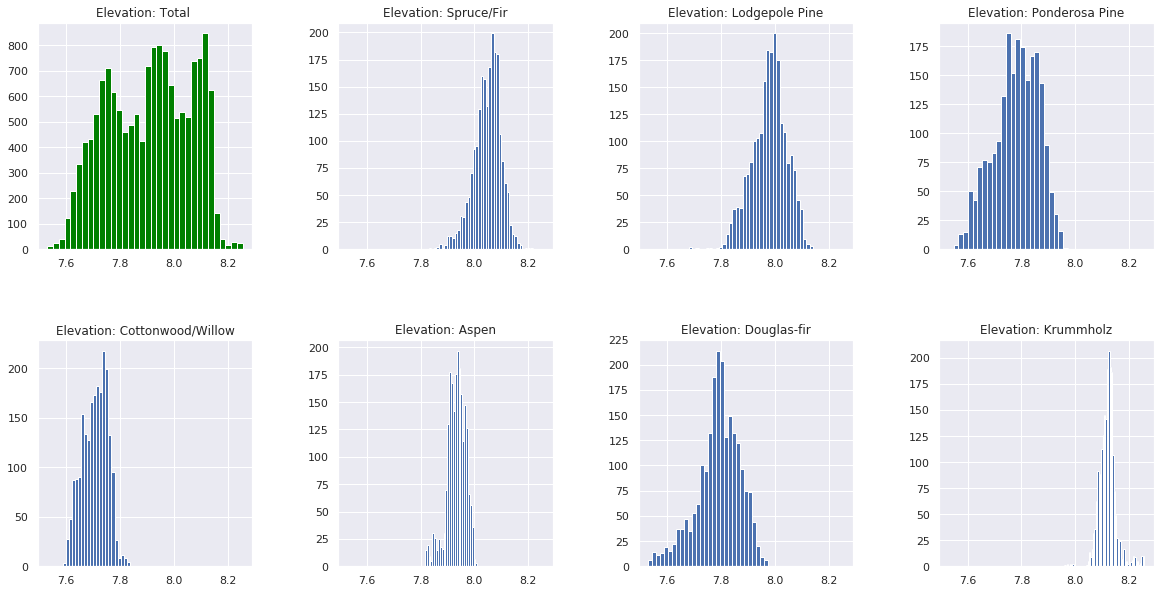

In [7]:
# Distribution of elevation for each cover type
plotFeatureHistogram(data, 'Elevation', Labels,True)

The boxplot below on Elevation shows 2nd and 3rd quartile (middle 50% data) for Cottonwood and Aspen trees (Cover Type 4 and 5) is shrinking to very small size as compared to others.  

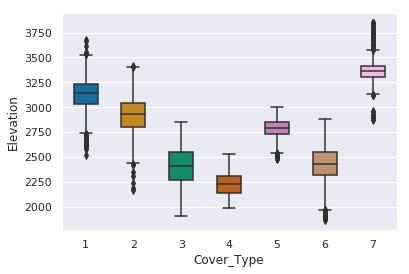

In [8]:
# Create boxplot to futher illustrate elevation's impact on cover type
sns.boxplot(y='Elevation', x='Cover_Type', data=data, width=0.5, palette="colorblind")

##### Aspect
The Histograms below show that Aspect differs most for Cottonwood and Aspen trees.

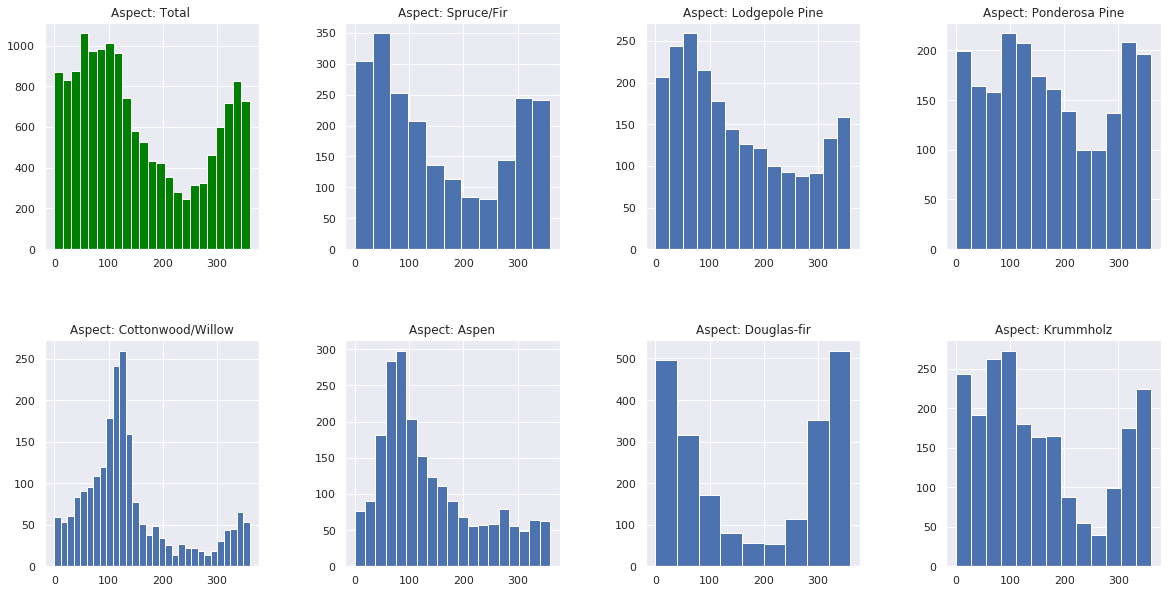

In [9]:
plotFeatureHistogram(data, 'Aspect', Labels, False)

##### Slope
Slope data both as a whole and grouped per Cover type is close to normal distribution.

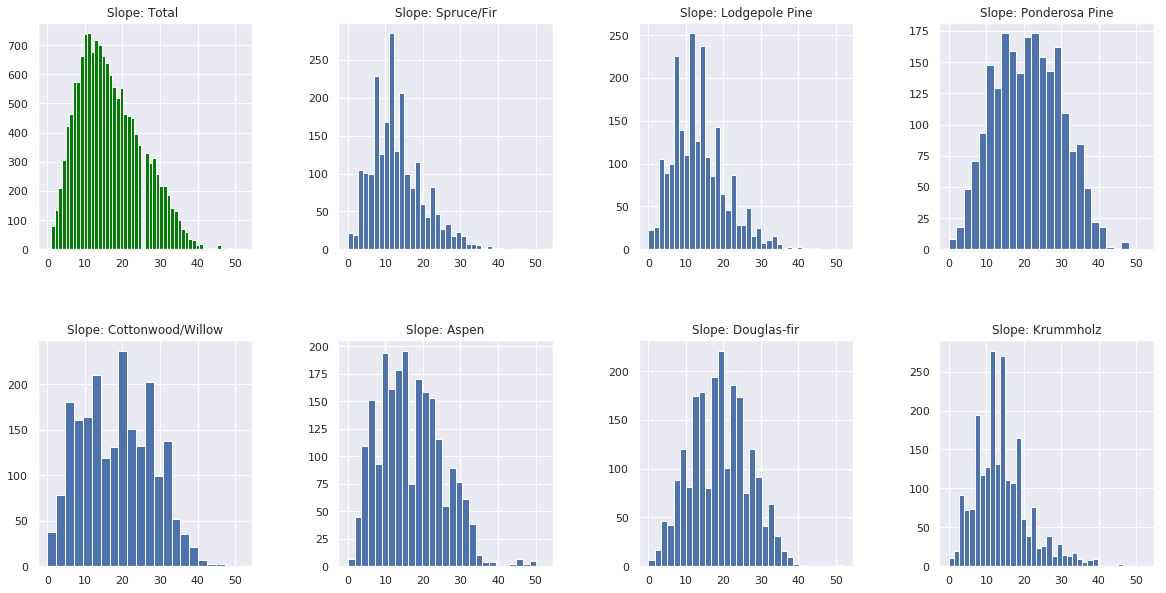

In [10]:
plotFeatureHistogram(data, 'Slope', Labels, False)

##### Horizontal_Distance_To_Hydrology
The same can be seen for Horizontal_Distance_To_Hydrology. No obvious departure between different cover types.

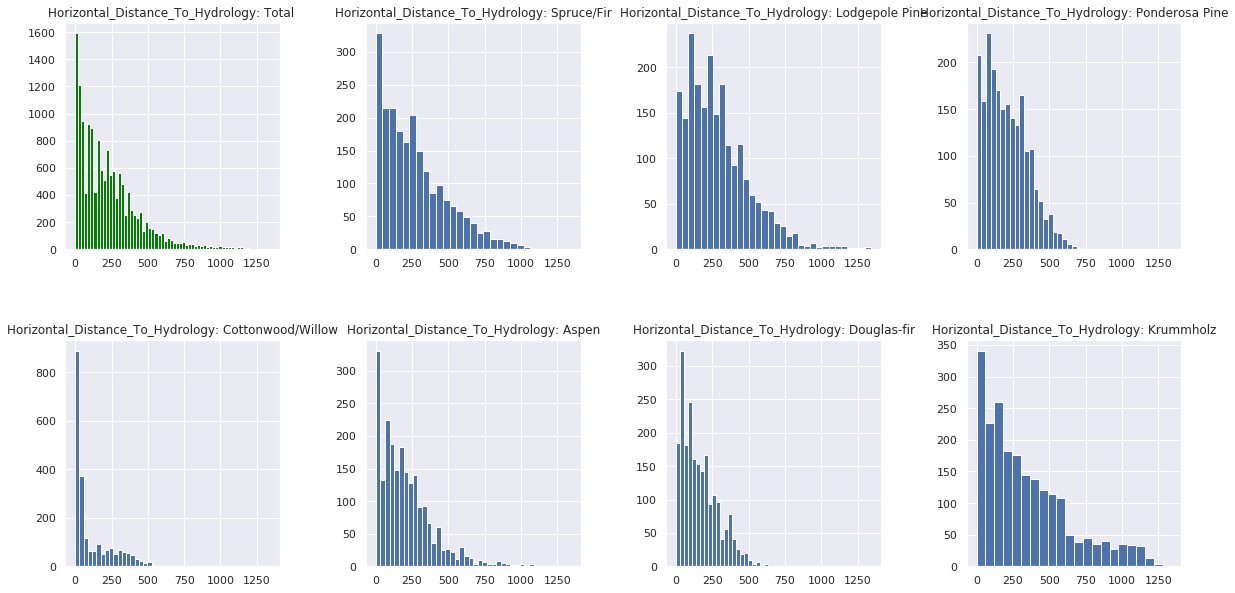

In [11]:
plotFeatureHistogram(data, 'Horizontal_Distance_To_Hydrology', Labels, False)

##### Vertical_Distance_To_Hydrology
We see no obvious departure between different cover types for Vertical_Distance_To_Hydrology.

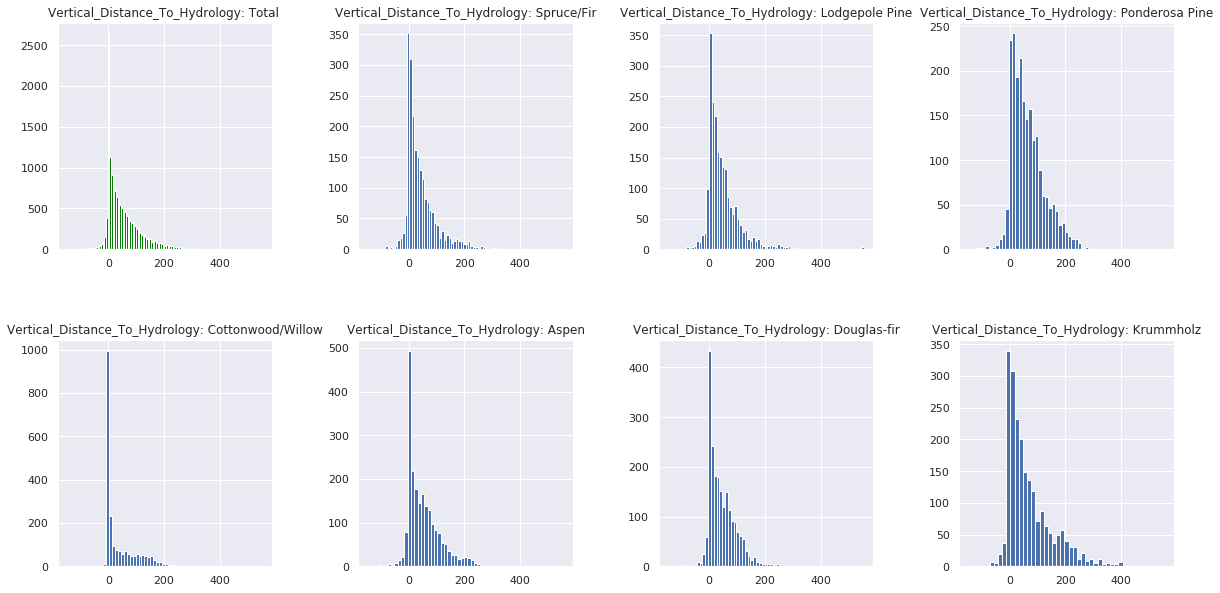

In [12]:
plotFeatureHistogram(data, 'Vertical_Distance_To_Hydrology', Labels, False)

### Soil Type  <a name="binary"></a>


Soil type is represented as a binary feature in data set, resulting in 40 different features for each soil type.

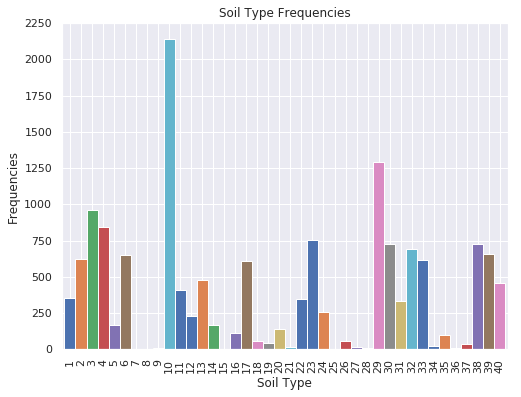

In [13]:
soil_df = data.loc[:,'Soil_Type1':'Soil_Type40']
soil_df.columns = range(1,41)
soil_series = soil_df.sum()

ax  = soil_series.plot(kind='bar', title = 'Soil Type Frequencies', width=1,figsize=(8, 6))
ax.set_xlabel('Soil Type')
ax.set_ylabel('Frequencies')
ax.xaxis.set_ticks_position('none') 
plt.show()

We see that some soil types are much more represented than others. If there are soil types, or any features for that matter, that are not represented at all, then we should completely remove them from our data so as to not skew our predicitons.

### Correlation Matrix <a name="correlation"></a>


Correlation matrix below visually represents relationship between 2 features and among cover type. Refer to last row, Cover_type VS Elevation shows Cover Type 4 does not exist where Elevation is more than around 2500. Cover Type 5 exists betwwen Elevations 2500 and 3000. cover Type 7 does not Exist where Elevation is less than 2700. 

Range of Aspect is uniform for all cover types that is 0 to aroubnd 375.

All Cover types exist in lower Slopes starting 0 but Only cover Types 5,6 & 7 exist where Slopes are around 50 

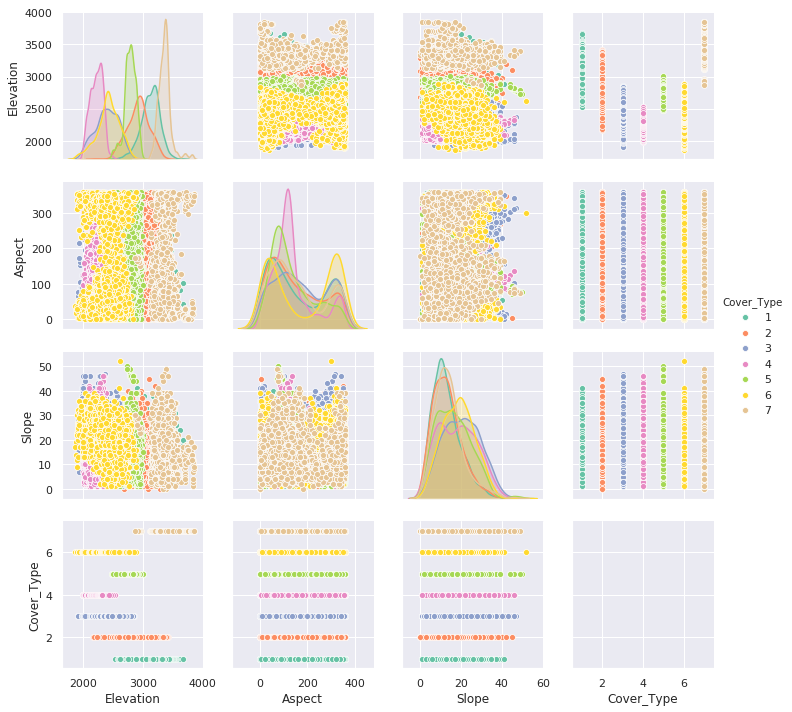

In [14]:
Quant_data = data.loc[:, 'Elevation': 'Slope']
Quant_data['Cover_Type'] = data['Cover_Type']
sns.pairplot(Quant_data, kind="scatter", hue="Cover_Type",  palette="Set2")
plt.show()

## Baseline Model <a name="baseline"></a>

We first start with a baseline Random Forest classifier model trained on all of the features. This is to establish an intiial accuracy and observe feature importance

In [15]:
# Display importances of features in classifier
def importances(estimator, col_array, title): 
    # Calculate the feature ranking - Top 20
    importances = estimator.feature_importances_
    indices = np.argsort(importances)[::-1] 
    print(str(title) + "Important Features\n")
    importances_df = pd.DataFrame(columns=['Rank','Feature', 'Importance'])
    
    
    for f in range(len(indices)):
        imp = np.around(importances[indices[f]],decimals=4)
        feat = col_array.columns[indices[f]]
        rank = f + 1
        importances_df.loc[f] = [rank, feat, imp]

    #Plot the feature importances of the forest 
    indices=indices[:10] 
    plt.figure() 
    plt.title(title+" Top 10 Feature importances") 
    plt.bar(range(10), importances[indices], color="gr", align="center") 
    plt.xticks(range(10), col_array.columns[indices], fontsize=14, rotation=90) 
    plt.xlim([-1, 10]) 
    plt.show()
    return importances_df

In [16]:
# Seperating features (X) and labels (y)
X, y = data.drop(["Cover_Type"], axis = 1), data["Cover_Type"]

train_data, dev_data, train_labels, dev_labels = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
print('train_data shape: ',train_data.shape)
print('train_labels shape: ',train_labels.shape)
print('dev_data shape: ',dev_data.shape)
print('dev_labels shape: ',dev_labels.shape)

train_data shape:  (12096, 55)
train_labels shape:  (12096,)
dev_data shape:  (3024, 55)
dev_labels shape:  (3024,)


In [17]:
# First Test with Random Forest (200 estimators)
RF_baseline = RandomForestClassifier(min_samples_split = 2, n_estimators = 200, max_depth = 20)
RF_baseline.fit(train_data, train_labels) # Fitting the train data to the classifier 
predict = RF_baseline.predict(test_data)
RF_pred = RF_baseline.predict(dev_data)
RF_f1 = metrics.f1_score(dev_labels, RF_pred, average='macro')
print("F1 of baseline model = " + str(RF_f1))


F1 of baseline model = 0.8592306804872397


Random ForestImportant Features



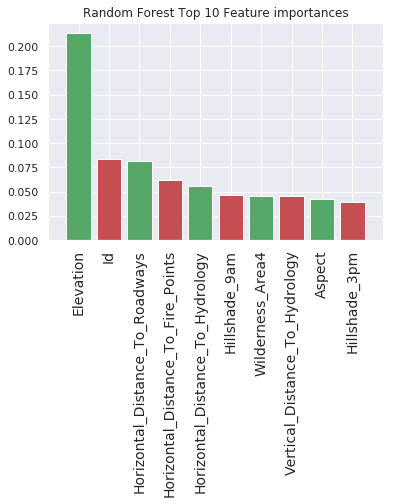

In [18]:
importances_df = importances(RF_baseline, train_data, "Random Forest")

In [19]:
importances_df

,Rank,Feature,Importance
0,1,Elevation,0.2138
1,2,Id,0.0833
2,3,Horizontal_Distance_To_Roadways,0.0815
3,4,Horizontal_Distance_To_Fire_Points,0.0619
4,5,Horizontal_Distance_To_Hydrology,0.0561
5,6,Hillshade_9am,0.0461
6,7,Wilderness_Area4,0.0454
7,8,Vertical_Distance_To_Hydrology,0.0451
8,9,Aspect,0.0425
9,10,Hillshade_3pm,0.0388


![](https://i.ibb.co/J5F8085/Screen-Shot-2019-04-07-at-2-03-43-PM.jpg)

Our baseline model does perform well on our dev data, with a 0.86 F1 score. However, after submitting the baseline values to Kaggle, we saw that the accuracy we scored a 71% accuracy:

Observing the feature importances returned from our baseline model, we can see that Elevation is exteremly significant, while soil types alone do not seem to have much contribution. As Horizontal and Vertical Distance To Hydrology both seem to be important features, one idea that immidieatly comes to mind is to combine both of these features into one. We will next explore the data a bit more and see if there is any cleaning we can do before moving onto feature engineering.

## Data Cleaning <a name="cleaning"></a>

### Remove Id

Since ID has no actual significance in terms of predicting a cover type, we remove it from our data

### Drop Missing Soil Types

We noticed that a few of the soil types seemed to have no representation in our training data, so we observe the data to see if there are any other features that have 0 only values

In [20]:
data.loc[:, (data == 0).all()].columns.values

array(['Soil_Type7', 'Soil_Type15'], dtype=object)

We see that only 2 of the soil types are completely unrepresented. Therefore, in our pre processing step, we will make sure to drop these columns from our data

### Scaling Transform

Scikit-learn has a `Pipeline` class that applys a list of transformations to the data, which we will utilize in our preprocessing. We apply an `Imputer`, which replaces missing values with a value based on the `strategy` specified. For this, we use the "median" strategy, meaning `NAN` values will be replaced by the median along each column. We also include a `StandardScaler` step, which subtracts the mean from each of the features and scales to unit variance

In [21]:
pipeline1 = Pipeline([('imputer', Imputer(strategy="median")),('std_scaler', StandardScaler())])

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## Feature Engineering <a name="engineering"></a>

While we are given a good amount of features, we realized that by creating our own features using existing ones we could help optimize our model’s performance. Our goal is to make the best possible prediction, so to do so, we need to make the most of the features we are given. This involves combining two significant features, or categorizing different ones to make them more digestable for the model. Below, we describe a few features that we created:

1.  **Euclidian distance to Hydration**
Upon our first naïve Random Forest model, we observed that horizontal and vertical distance were both in the top most important features that the model found. We then decided to create a new feature that combined both of these features into one single feature, which we believed would have great influence on the model. By creating a new feature using two features that the model already found were key, we would be able to drop the other 2 features. We decided to use the Euclidian distance, which is essentially the diagonal distance of the two features.
<br/><br/>
$$\sqrt{\sum_{i=1}^n (x_i-y_i)^2}$$

<br/><br/>

2.  **Soil Type** – We saw that in our baseline model, soil types were not individually very important features. We instead wanted to see if we could create a new feature using other information about the soil types. We were given some description on each of the soil types, including their soil family and their texture. We created 3 a new features based on their textures: `soil_stony`, `soil_rubbly`, and `soil_other`
<br/><br/>
3. **Hillshade Mean** - We are given the Hillshade index at 9:00 am, noon, and 3:00 pm. Given this information, and the fact that our baseline model did give importance to these features, we added another feature `Hillshade_mean`, which represents the average of these three indeces
<br/><br/>
$$ HillshadeMean = \frac{Hillshade9am + Hillshade3pm + HillshadeNoon}{3} $$


<br/><br/>

The data cleaning, feature selection, preprocessing steps, and the feature engineering described up to this point are all performed in the function `data_preprocess`. This will be run on both the training and testing data, to make sure the data are in sync.


In [22]:
def data_Preprocess(df):
    # Adding Hillshade_Mean Feature
    df['Hillshade_Mean'] =  (df['Hillshade_9am'] + df['Hillshade_Noon']  + df['Hillshade_3pm']) * (1/3) # Mean Hillshade
    
    # Adding Euclidian Distance
    df['Euclidean_Dist_To_Hydrology'] =  np.sqrt(df['Horizontal_Distance_To_Hydrology'] **2 + df['Vertical_Distance_To_Hydrology'] **2 )

    # Categorizing Soil Types by texture
    stony_col = ['Soil_Type1', 'Soil_Type2', 'Soil_Type6', 'Soil_Type9', 'Soil_Type12', 'Soil_Type18', 'Soil_Type22', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
    rubbly_col = ['Soil_Type3','Soil_Type4', 'Soil_Type5', 'Soil_Type10', 'Soil_Type11', 'Soil_Type13']
    other_col = ['Soil_Type7', 'Soil_Type8', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type23', 'Soil_Type35']
    df['soil_stony'] = df[stony_col].sum(axis=1)
    df['soil_rubbly'] = df[rubbly_col].sum(axis=1)
    df['soil_other'] = df[other_col].sum(axis=1)    

    # ---------- Removing below features ---------
    df = df.drop(['Id'], axis=1) # Removing 'Id' column
    df = df.drop(['Soil_Type7','Soil_Type15'], axis=1)

    return df

In [23]:
pre_processed_data = data_Preprocess(data)
# Seperating features (X) and labels (y). 'Id' is not a feature, so removed.
X_2, y = pre_processed_data.drop(["Cover_Type"], axis = 1), data["Cover_Type"]

X_preproc = pipeline1.fit_transform(X_2)
print(X_preproc.shape)

test_data_preproc = data_Preprocess(test_data)
test_data_preproc = pipeline1.transform(test_data_preproc)

(15120, 57)


In [24]:
train_data2, dev_data2, train_labels2, dev_labels2 = train_test_split(X_preproc, y, test_size=0.2, random_state=42, stratify = y)
print('train_data shape: ',train_data2.shape)
print('train_labels shape: ',train_labels2.shape)
print('dev_data shape: ',dev_data2.shape)
print('dev_labels shape: ',dev_labels2.shape)

train_data shape:  (12096, 57)
train_labels shape:  (12096,)
dev_data shape:  (3024, 57)
dev_labels shape:  (3024,)


<h2 align="center"> Model Selection <a name="model"> </a> </h2>

   1. [Support Vector Machine](#svm)
   2. [Random Forest](#rf)
   3. [Extra Trees](#extra)   
   4. [XGBoost](#xg)

We will use ensemble method by testing F1 against development data set which has 3,024 observations. 

First, we train base supervised classifiers. Based on accuracies of all the models, we use an ensemble `Voting Classifier` to select the best models.

We utilized GridSearch to optimize the hyperparameters for each of our individual classifiers. However, due to our  collaboration across various versions of this project, we have commented out the GridSearch steps to minimize runtime and have generated models below using our known best parameters

In [25]:
import time
index = np.array([0, 1, 2,3,4])
model_performance_df = pd.DataFrame(columns = ['Model Name', 'Train Time(s)', 'Prediction Time(s)', 'F1 Score'], index=index)

In [26]:
# Pipeline for fitting model, making predictions, and saving performance metrics
def process_model(clf, clf_name, idx):
    start_train = time.time()
    clf.fit(train_data2, train_labels2) # Fitting the train data to the classifier   
    end_train = time.time()
    train_time = str(round(end_train - start_train, 2))
    
    # Make prediction on dev data
    start_test = time.time()
    pred = clf.predict(dev_data2)
    end_test = time.time()
    test_time = str(round(end_test - start_test, 2))
    
    # Store metrics
    dev_f1 = round(metrics.f1_score(dev_labels2, pred, average='macro'), 2)
    print('F1 Score for ' + clf_name + " = " + str(dev_f1))
    model_performance_df.iloc[idx] = [clf_name, train_time, test_time, dev_f1]
    
    # Uncomment to generate prediction .csv files to submit to Kaggle. Otherwise, leave commented, as predicting on test_data takes
    # long runtime
    
#     predict = clf.predict(test_data_preproc)
#     submission = pd.DataFrame({'Id': test_data.Id, 'Cover_Type': predict})
#     csv_name = "submission_weak_" + str(idx) + ".csv"
#     if idx == 4:
#        scv_name = "submission.csv"
#     submission.to_csv(csv_name, index=False)

### Support Vector Machine <a name="svm"> </a>

Support Vector Machines are a fast supervised learning model that perform non-linear classification. They represent points in a space with a gap in between the two classifications. New examples are mapped to this space and classified as belonging to one side of the gap vs the other

In [27]:
# params = {'kernel': ['rbf'], 'gamma': [0.5, 0.1, 0.05], 'C': [1, 10, 50, 100]}
# clf = GridSearchCV(SVC(), params)
# clf.fit(train_data2, train_labels2)
# print(clf.best_params_) 

svm_clf =  SVC(kernel="rbf", gamma=.05, C=50)
process_model(svm_clf, 'SVM', 0)

F1 Score for SVM = 0.82


![](https://i.ibb.co/7tfgTkz/svm-weak.jpg)

### Random Forest <a name="rf"></a>


We now try ensemble methods, starting with averaging classifiers (Random Forest, Extra Trees).

In averaging principle, by creating multiple classifiers independently and then averaging them, the combined classifier is usually better than its constituents because various errors of constituents 'average out'. Random forest is well-suited for multi-class modeling for large samples. An advantage of Random Forest is that it avoids over-fitting by averaging the outcome of several decision trees. We also limited the depth of trees to 20 to help minimize over-fitting. Random forest have easy-to-follow logic to shed light on theory underlying the predictions.

In [28]:
# params = {'min_samples_split': ['2,3,5'], 'n_estimators': [50,100,200,500], 'max_depth': [10, 20, 30]}
# clf = GridSearchCV(RandomForestClassifier(), params)
# clf.fit(train_data2, train_labels2)
# print(clf.best_params_) 

RF_clf = RandomForestClassifier(min_samples_split = 2, n_estimators = 200, max_depth = 20)
process_model(RF_clf, 'Random Forest', 1)

F1 Score for Random Forest = 0.84


![](https://i.ibb.co/VmcLg94/RF-weak.jpg)

### Extra Trees <a name="extra"></a>


Extra trees add a layer of randomization to decision tree modeling and takes into account the whole learning sample instead of bootstrap sample.

In [29]:
# params = {'max_features': ['0.8, 1'], 'n_estimators': [50,100,200,500], 'max_depth': [10, 20, 30]}
# clf = GridSearchCV(ExtraTreesClassifier(), params)
# clf.fit(train_data2, train_labels2)
# print(clf.best_params_) 

ExtrTree_clf = ExtraTreesClassifier(max_features=0.8, max_depth = 20, n_estimators=500)
process_model(ExtrTree_clf, 'Extra Trees', 2)

F1 Score for Extra Trees = 0.87


![](https://i.ibb.co/h2xkBSF/Extra-Trees-Weak.jpg)

### XGBoost (Extreme Gradient Boosting) <a name="xg"> </a>

XGBoost uses gradient descent to correct for mistake of previous decision tree model. It builds trees in series, and increases weights of incorrectly classified nodes, while decreasing those of the correctly classified. This uses the concept of "boosting" to continually improve a model by focusing on missclassifications.


In [30]:
# params = {'learning_rate': ['0.01, 0.05, 0.1'], 'n_estimators': [50,100,200,500], 'max_depth': [10, 20, 30]}
# clf = GridSearchCV(xgb.XGBClassifier(), params)
# clf.fit(train_data2, train_labels2)
# print(clf.best_params_)

xgb_clf = xgb.XGBClassifier(max_depth = 10, n_estimators = 500, learning_rate = 0.1)
process_model(xgb_clf, 'XGBoost', 3)

F1 Score for XGBoost = 0.86


![](https://i.ibb.co/hZfP9Jc/XGBoost-weak.jpg)

### Ensemble  <a name="ensemble"></a>
*Putting it all together*

We chose a *Voting Classifier* to combine conceptually different machine learning classifiers and use a majority vote to predict cover type. Voting classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.


We used all 4 of our base models and were able to get a higher accuracy than any one model individually recorded

In [31]:
voting_clf = VotingClassifier(estimators=[('svm_clf', svm_clf),('RF_clf', RF_clf),('ExtrTree_clf', ExtrTree_clf),('XGBoost', xgb_clf)], voting='hard')
process_model(voting_clf, 'Ensemble', 4)

F1 Score for Ensemble = 0.86


![](https://i.ibb.co/bs4d52H/kaggle-test.png)

### Results  <a name="results"></a>


The best result is using voting classifier on 
* Support Vector Machine
* Random Forest
* Extra Trees
* XGBoost models

In [32]:
model_performance_df

,Model Name,Train Time(s),Prediction Time(s),F1 Score
0,SVM,8.48,2.16,0.82
1,Random Forest,5.05,0.16,0.84
2,Extra Trees,23.41,0.5,0.87
3,XGBoost,233.98,2.48,0.86
4,Ensemble,271.68,5.14,0.86


The above chart displays the training and prediction time for each classifier, as well as how they performed on our dev data. We see that the Extra Trees does show a bit better results than our ensemble learner. However, we know that since we optimized hyperparameters for each of our classifiers, and the ensemble learner brings together all of them, we are confident that it will have less chance of overfitting and be a more robust classifier when we test on the Kaggle testing data. We see that in terms of runtimes on the dev data, XGBoost and the ensemble clearly took longer than others. Ensemble we would expect to take longer, as it has to encorporate multiple other learners. However, XGBoost's runtime cost to result ratio may not be favorable when compared to ExtraTrees, which takes less training/predicting time and gives a higher F1 score.

Rather than relying on one classifier, the Ensemble will be able to use the strengths of all of our weak learners and take a vote. We demonstrated in the screenshots from Kaggle submissions after each weak classifier that they each individually did perform well. We even noticed that the Random Forest classifier, which was our baseline and originally scored a 71% accuracy, was able to reach 73% accuracy after feature engineering, data cleaning, and hyperparameter tuning. However, the goal of this experiment was to prove that while each learner does perform well individually, putting them in an ensemble would render the best results. We clearly did prove this, as is evident when you see the final accuracy recorded from Kaggle for the VotingClassifier, which shows it is higher than any individual learner.

Best Weak Classifier(Extra Trees)Important Features



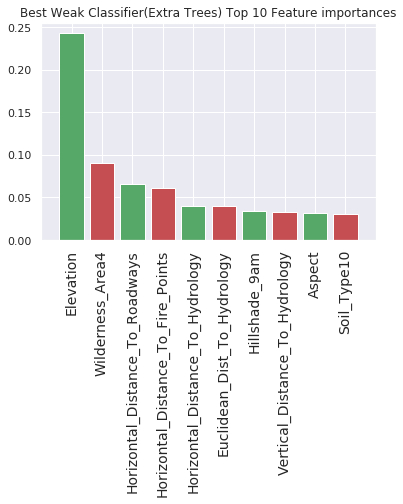

In [33]:
importances_df = importances(ExtrTree_clf, X_2, "Best Weak Classifier(Extra Trees)")

Since sickit-learn's `VotingClassifier` does not have a feature importance built-in function, we observe our Extra Trees classifier's feature importances. It is great to see that Euclidean Distance to Hydrology, a feature that we engineered, has made it into the top 10. This means that our feature engineering was fruitful, as we see that our feature was integral in one of our most effective models.

### Error Analysis <a name="error"></a> </h2>

As we have found the best models and ensemble for predicting the `test_data` with 75.50% accuracy, it is now time to analyze the errors the ensemlber made in predicting `train_data` while training. We create a confusion matrix to show the aggregated predicted vs. actual labels for each class.

In [34]:
train_labels_pred = cross_val_predict(voting_clf, train_data, train_labels, cv=3) # predicting labels for train_data using cross validation
conf_mx = confusion_matrix(train_labels, train_labels_pred) # Creating a confusion matrix
print(conf_mx)

[[1316  271    1    0   33    4  103]
 [ 300 1264   30    0   95   29   10]
 [   0   16 1433   81   15  183    0]
 [   0    5   27 1679    0   17    0]
 [   3   73   23    0 1609   20    0]
 [   2   20  120   45   14 1527    0]
 [  56    3    0    0    2    0 1667]]


We plot below pictorial represenation matrix for above confusion matrix. From this represenation, we can see that `Cottonwood/Willow` is the best predicted class with only 49 mislabeled classes. Also, `Lodgepole Pine` is the worst predicted class with 466 mislabeled classes. 

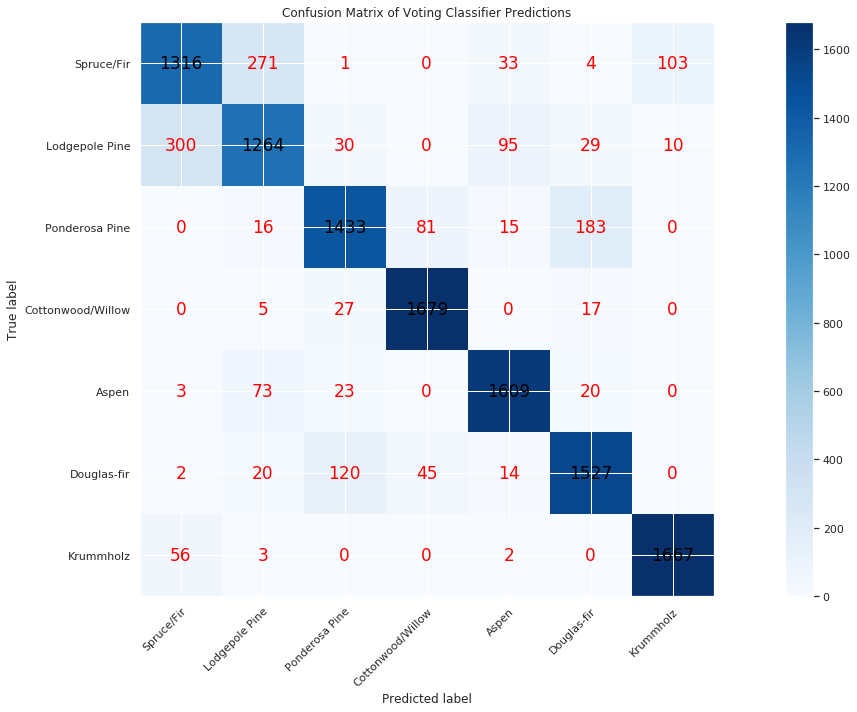

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(conf_mx, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(conf_mx.shape[1]),yticks=np.arange(conf_mx.shape[0]), 
           xticklabels=Labels, yticklabels=Labels,
           title='Confusion Matrix of Voting Classifier Predictions',
           ylabel='True label',
           xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(conf_mx)):
    for j in range(len(conf_mx)):
        if i == j :
            text = ax.text(j, i, conf_mx[i, j],
                       ha="center", va="center", color="black", fontsize= 17)
        else: 
            text = ax.text(j, i, conf_mx[i, j],
                       ha="center", va="center", color="red", fontsize= 17)

fig.tight_layout()
plt.show()

Below pictorial represenation matrix can provde an insight into what fraction of predictions are mislabeled for each class.

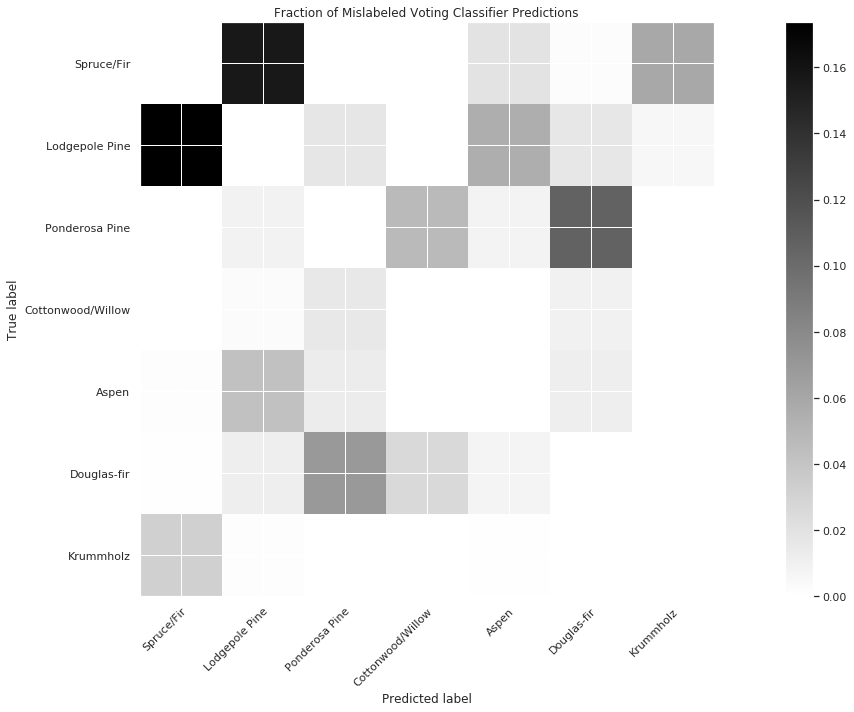

In [36]:
row_sums = conf_mx.sum(axis=1, keepdims=True) # To add up all the errors made for each class.
norm_conf_mx = conf_mx/row_sums #To measure the fraction of classes that are wrongly classified.
np.fill_diagonal(norm_conf_mx, 0) # Fill the diagonal elements with zeros to only concentrate on the errors

fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(norm_conf_mx, interpolation='nearest', cmap='binary')
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(norm_conf_mx.shape[1]),yticks=np.arange(norm_conf_mx.shape[0]), 
           xticklabels=Labels, yticklabels=Labels,
           title='Fraction of Mislabeled Voting Classifier Predictions',
           ylabel='True label',
           xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",   rotation_mode="anchor")
fig.tight_layout()
plt.show()

### Conclusion <a name="conclusion"></a> </h2>

Overall, we were pleased with our results and were impressed that feature engineering and data cleaning was able to give us such improved results. Compared to the 71% initial baseline, with no preprocessing, no hyperparameter optimization, and no ensemble. we  were able to see singificant improvements by optimizing hyperparameters, cleaning our data, creating new features, and dropping unnecessary features. Utilizing the ensemble method allowed us to use all of our best models in parallel.

Feature engineering was an fascinating and rewarding step in this project. It involved both creatively coming up with solutions, as well as observing data correlations and significance of different features we were combining. It was very gratifiying to see features we had engineered have high significance in our final models, as it proved that the features we created were playing a big role in the model's predictions.

Our project could have been improved if we had had potentially more training data and more features to work with. The size of the training data was significantly smaller compared to the testing data (15120 vs 565892 rows, respectively). This puts us at a disadvantage when we submit to Kaggle, as we have so many fewer data points to train our model on. There may be trends in the testing data that we may not know about and some features may be better predictors in the testing data that we would not know. It would have also been nice to have more features available, such as amount of rainfall in the area or amount of fires/polution or some sort of "tree detrimental" feature we could have used.

If we time had allowed, there are a few improvements we would have wanted to do to our final model. We would have tried to create more features and seen if we could have isolated a few more existing features to drop off. Also, we did not get a chance to encorporate our Keras model (not included) which did show good results, yet we ran into trouble when trying to work it into our ensemble model. However, we are proud of our final results and feel like the project really taught us about the pros and cons of different ML models and how much work goes into just features alone when tackling these sorts of projects